# Punto 1

## Importar los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path = 'https://raw.githubusercontent.com/carlos-paezf/Simulacion/main/Segundo_Corte/2021.csv'
data = pd.read_csv(path, encoding='utf-8')

In [3]:
df = pd.DataFrame(data)

## Conocer los datos

In [ ]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [ ]:
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


## 2.	Analizar con un gráfico de caja la esperanza de vida de las personas en el mundo por región, América, Europa….

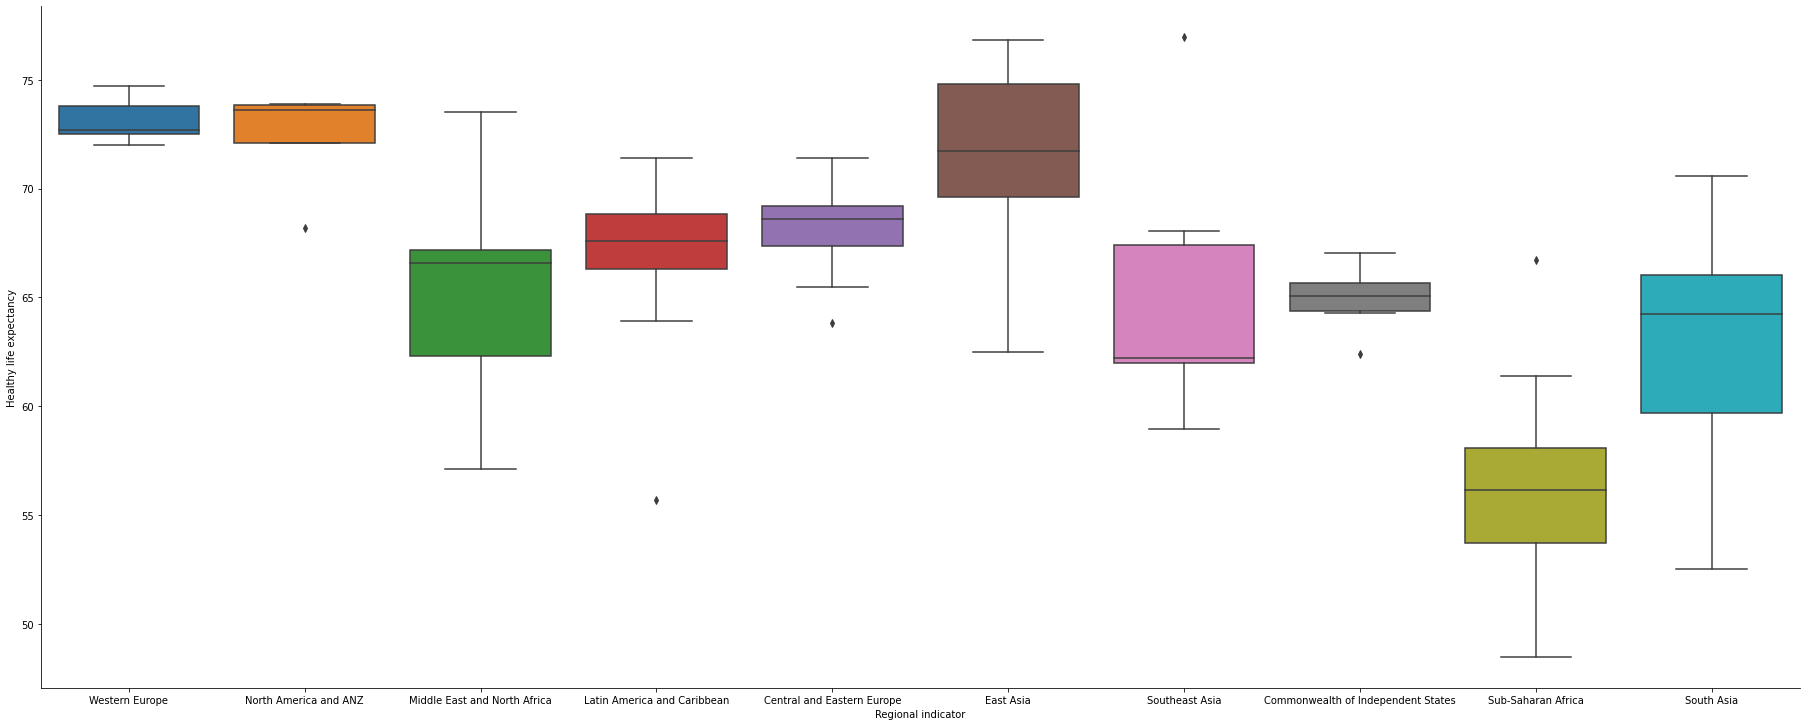

In [ ]:
sns.catplot(x='Regional indicator', y='Healthy life expectancy', data=df, kind='box', height=10, aspect=25/10)

Las regiones de Europa Occidenta, Norteamerica y el Este de Asia, son los sectores donde la espectativa de vida saludable supera los 70 años. Mientras que la region del Sub-Sáhara en África, presenta una espectativa de vida saludable menor de los 60 años. Los demás sectores (Medio este y norte de África, Latinoamerica y el Caribe, el centro y Este de Europa, sureste y sur de asia) presentan una expectativa de vida entre los 60 y 70 años.

## 3.	¿Cómo se encuentra Colombia en el puntaje de felicidad respecto a la media mundial?

In [ ]:
colombia = df[df['Country name']=='Colombia']

In [ ]:
colombia.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
51,Colombia,Latin America and Caribbean,6.012,0.061,6.132,5.892,9.557,0.847,68.001,0.837,-0.135,0.841,2.43,1.021,0.866,0.615,0.554,0.1,0.063,2.794


In [ ]:
df[df['Ladder score']>6.012]['Ladder score'].count()

52

In [ ]:
df[df['Ladder score']<6.012]['Ladder score'].count()

97

In [ ]:
df['Ladder score'].mean()

5.532838926174494

Colombia se encuentra en el puesto N° 52 de la lista, con un Ladder Score de 6.012, superando a 97 países registrados, pero estando por debajo de 51. Podemos afirmar que colombia se encuentra esta por encima de un 50% de los países, pero tiene un raking menor al 25% de los países mas felices. La media de Ladder Score es de 5.532, ubicando a Colombia por encima del mismo. 

## Gráficas

### Análisis descritivo - exploratorio 

Text(0, 0.5, 'Expectativa de vida')

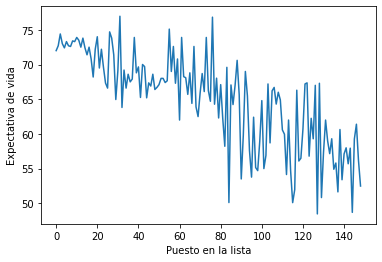

In [6]:
plt.plot(df['Healthy life expectancy'])
plt.xlabel('Puesto en la lista')
plt.ylabel('Expectativa de vida')

Entre mayor sea el puesto que el país ocupa en la lista, menor sera su expectativa de via.

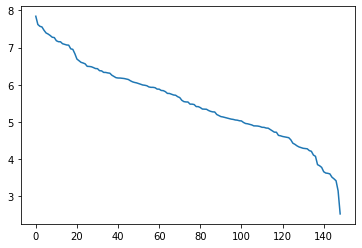

In [5]:
plt.plot(df['Ladder score'])
plt.xlabel('Puesto en la lista')
plt.ylabel('Nivel de felicidad de 0 a 10')

Entre mayor sea el puesto que el país ocupa en la lista, menor sera su nivel de percepción de felicidad.

### Análisis inferencial

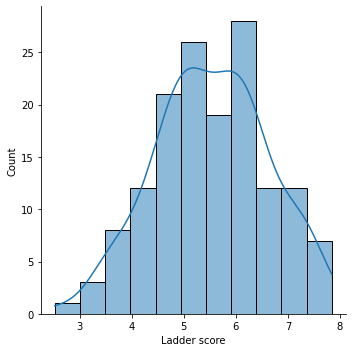

In [7]:
sns.displot(df['Ladder score'], kde=True)

Podemos inferir que el nivel de felicidad tiene una mayor frecuencia en valores de entre [5, 7)

In [22]:
min =  df[df['Ladder score']>=5.001]
max = min[min['Ladder score']<7]
max.head(10)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
17,Czech Republic,Central and Eastern Europe,6.965,0.049,7.062,6.868,10.556,0.947,70.807,0.858,-0.208,0.868,2.43,1.370,1.090,0.703,0.580,0.052,0.046,3.124
18,United States,North America and ANZ,6.951,0.049,7.047,6.856,11.023,0.920,68.200,0.837,0.098,0.698,2.43,1.533,1.030,0.621,0.554,0.252,0.154,2.807
19,Belgium,Western Europe,6.834,0.034,6.901,6.767,10.823,0.906,72.199,0.783,-0.153,0.646,2.43,1.463,0.998,0.747,0.489,0.088,0.187,2.862
20,France,Western Europe,6.690,0.037,6.762,6.618,10.704,0.942,74.000,0.822,-0.147,0.571,2.43,1.421,1.081,0.804,0.536,0.092,0.235,2.521
21,Bahrain,Middle East and North Africa,6.647,0.068,6.779,6.514,10.669,0.862,69.495,0.925,0.089,0.722,2.43,1.409,0.899,0.662,0.661,0.246,0.139,2.631
22,Malta,Western Europe,6.602,0.044,6.688,6.516,10.674,0.931,72.200,0.927,0.133,0.653,2.43,1.411,1.055,0.747,0.664,0.275,0.183,2.268
23,Taiwan Province of China,East Asia,6.584,0.038,6.659,6.510,10.871,0.898,69.600,0.784,-0.070,0.721,2.43,1.480,0.982,0.665,0.490,0.142,0.139,2.687
24,United Arab Emirates,Middle East and North Africa,6.561,0.039,6.637,6.484,11.085,0.844,67.333,0.932,0.074,0.589,2.43,1.555,0.860,0.594,0.670,0.236,0.223,2.422
25,Saudi Arabia,Middle East and North Africa,6.494,0.056,6.604,6.384,10.743,0.891,66.603,0.877,-0.149,0.684,2.43,1.435,0.964,0.571,0.603,0.090,0.163,2.668
26,Spain,Western Europe,6.491,0.042,6.574,6.408,10.571,0.932,74.700,0.761,-0.081,0.745,2.43,1.375,1.057,0.826,0.462,0.135,0.124,2.513


Los anteriores son los 10 países que prensentan una mayor percepción de felicidad dentro del rango de [5, 7)

In [ ]:
sns.pairplot(df, hue='Ladder score', size=4, vars=['Logged GDP per capita', 'Healthy life expectancy'], kind='scatter')

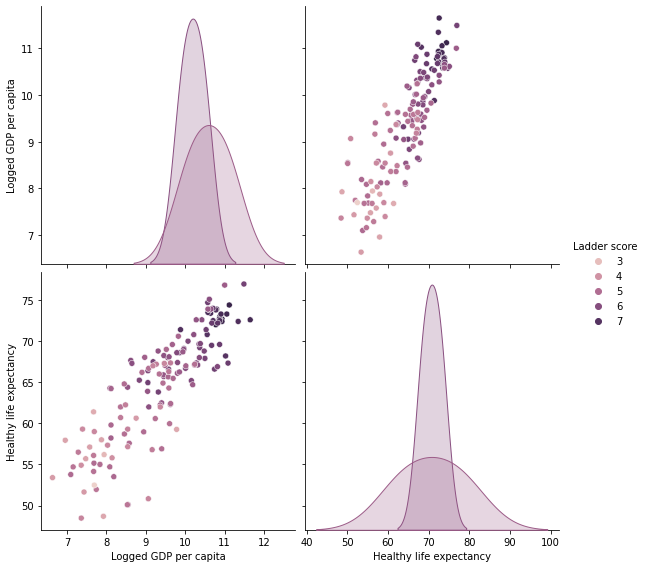

En la gráfica anterior analizamos la expectativa de vida, economía per-capita, y la influencia que ejercen sobre el nivel de felicidad

# Punto 2

La ventanilla de un banco realiza las transacciones en un tiempo medio de 2 minutos. los clientes llegan con una tasa media de 20 clientes a la hora. Si se supone que las llegadas siguen un proceso de Poisson y el tiempo de servicio es exponencial, determina:

1. El porcentaje de tiempo en el que el cajero está desocupado. 
2. El tiempo medio de estancia de los clientes en la cola. 
3. La fracción de clientes que deben esperar en la cola.


$\lambda$ = Velocidad de llegada de clientes al sistema (clientes-tiempo)  
$\mu$ = Velocidad de atención (clientes-tiempo)   

- $\lambda$ = 20 clientes/hora
- $\mu$ = 30 transacciones/hora

In [ ]:
lam = 20
mu = 30

## Punto 1: % tiempo de cajero desocupado:

$$ P = \frac{\lambda}{\mu} < 1 $$  

$$ Po = 1 - P $$

In [ ]:
P = lam / mu
Po = 1 - P
Po

0.33333333333333337

La probabilidad de que el cajero este desocupado es de un 33.3%

## Punto 2. Tiempo medio de estancia de los clientes en la cola

$$ L_{q} = \frac{\lambda^{2}}{\mu(\mu -\lambda)} $$

$$ Wq = \frac{L_{q}}{\lambda} $$

In [ ]:
Lq = lam**2 / (mu * (mu-lam))
Wq = Lq / lam
Wq

0.06666666666666667

La probabilidad de que un cliente este en la cola es del 6.6%, lo cual representa 1/15 de hora, o 4 minutos.

## Punto 3: fracción de clientes que deben esperar en la cola

$$ W = W_{q} + \frac{1}{\mu} $$

$$ L = \lambda W$$

In [ ]:
W = Wq + (1/mu)
L = lam * W
fracc = Lq / L
fracc

0.6666666666666666

$\frac{2}{3}$ o el 66.6% de los clientes debe esperar en la cola.